## **Import Required libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [12]:
df = pd.read_csv('/content/credit_data.csv')
df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


### Basic Dataset Understanding

In [13]:
df.shape #shape of the dataset rows, columns

(279856, 15)

In [14]:
df.info()  # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [15]:
df.isnull().sum()/len(df)*100 # percentage of missing values

,0
Age,0.000000
Gender,0.000000
Income,0.000000
Credit Score,0.000000
Credit History Length,0.000000
Number of Existing Loans,0.000000
Loan Amount,0.000000
Loan Tenure,0.000000
Existing Customer,0.000000
State,0.000000


### Observarions

*   dataset contain applicant demographic and financial features
*   mix of numerical and categorical columns
*   Some columns may contain missing values
*   Occupation column contain more than 30% missing value





In [16]:
df.drop('Occupation',axis=1,inplace=True,errors='ignore')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

### Handle Missing Values (Loop – clean way)

In [18]:
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
#no warning
# clean & professional

### Encode Categorical Columns

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


# Heatmap (Profile Score vs Others)

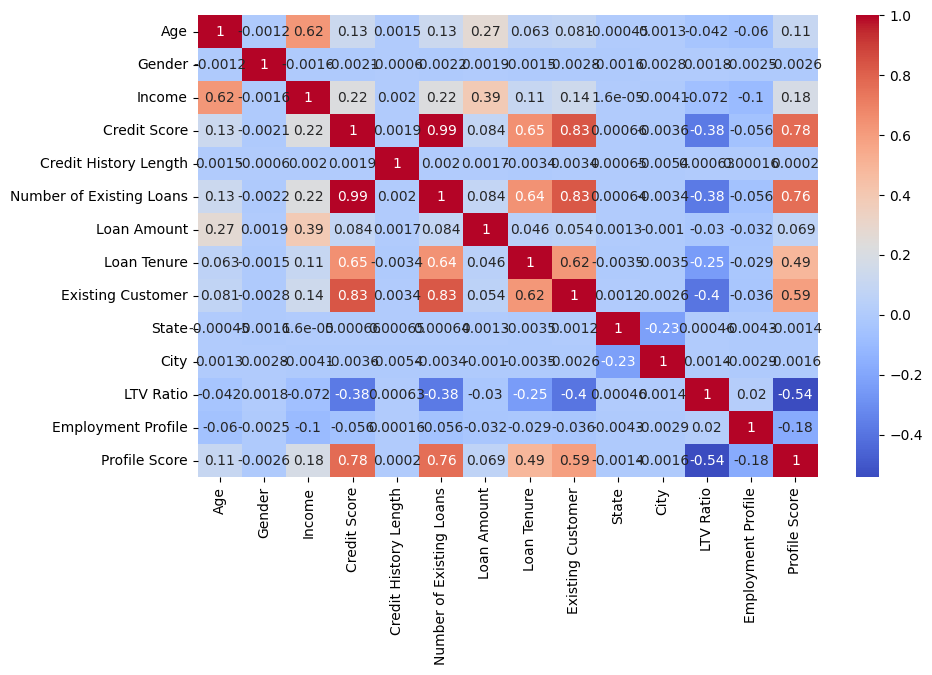

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Selecting Target Variable

In [21]:
X = df.drop('Profile Score', axis=1)
y = df['Profile Score']

# Split Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(223884, 13)
(55972, 13)
(223884,)
(55972,)


# Decision Tree Model

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [25]:
y_pred_dt = dt.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(y_test, y_pred):
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2:", r2_score(y_test, y_pred))

print("Decision Tree:")
evaluate(y_test, y_pred_dt)

Decision Tree:
MAE: 0.6479489744872436
RMSE: 3.3183346663941813
R2: 0.9815962993268138


# KNN Model

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# Model Evaluation

In [28]:
print("\nKNN:")
evaluate(y_test, y_pred_knn)


KNN:
MAE: 12.090377331522904
RMSE: 16.835503661023377
R2: 0.5262851273971052


# Control Overfitting

In [29]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
evaluate(y_test, y_pred)


MAE: 7.748375583434997
RMSE: 10.326383108567118
R2: 0.8217780219526611


### Hyperparameter tuning was applied to reduce overfitting.

# Feature Importance

In [30]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance


,Feature,Importance
3,Credit Score,0.728701
11,LTV Ratio,0.235764
12,Employment Profile,0.035535
0,Age,0.000000
1,Gender,0.000000
4,Credit History Length,0.000000
2,Income,0.000000
5,Number of Existing Loans,0.000000
6,Loan Amount,0.000000
8,Existing Customer,0.000000


# Income and Credit Score were the most influential features.

# Save the Model (FOR DEPLOYMENT)

In [31]:
import pickle

pickle.dump(dt, open("profile_score_model.pkl", "wb"))
